In [7]:
from brian2 import *
from matplotlib import pyplot as plt
import pyoelectricity as pel

This is a simple example demonstrating the use of our source code to calculate ephaptic interactions

In [68]:
# define the source morphology
source_morpho = Cylinder(x=[0, 0.5]*cm, diameter=10*um, n=1000)

# Add a bouton at the end (3 times the nominal diameter)
source_morpho.diameter[source_morpho.x>(source_morpho.x[-1]-30*um)] = 30*um

# define the source model
source_neuron = pel.make_tasaki_neuron(morpho=source_morpho)
#source_neuron = pel.make_hh_neuron(morpho=source_morpho)

# run the source simulation
source_simulation = pel.run_cable(source_neuron,
                                  defaultclock_dt=1*us,
                                  record_dt=1*us,
                                  I_stimulation=0.5*uamp,
                                  post_stim_duration=4*ms)

Theory:      3.41m/s,  0.146mm
Simulation:  3.35m/s,  0.075mm


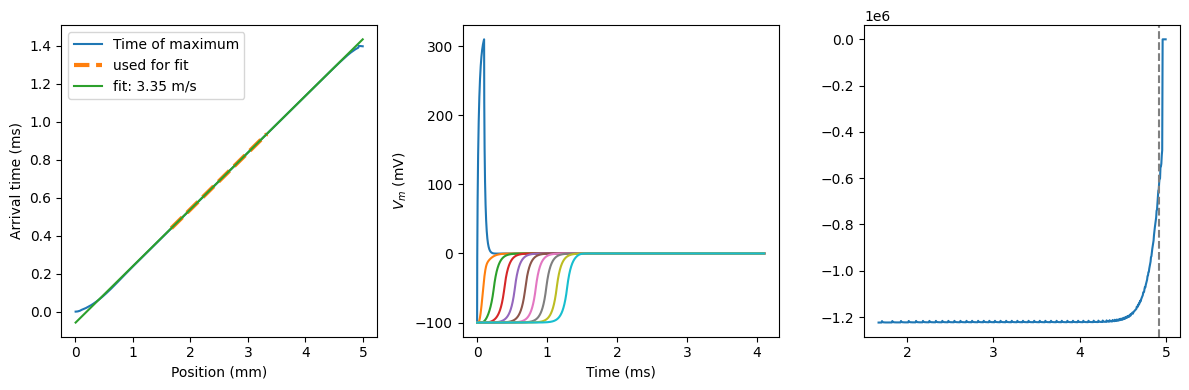

In [10]:
# check the source AP
v, lambd = pel.get_velocity(source_simulation, is_collision=False)
plt.tight_layout()

In [70]:
# define the target
target_morpho = Cylinder(x=[0.25, 0.75]*cm, y=[10, 10]*um, diameter=10*um, n=500)

# calculate electric potential at the target
t_ext, v_ext = pel.calculate_V_e_Parallel(source_recording=source_simulation,
                                         target=target_morpho,
                                         sigma=1/(100*ohm*meter))

  0%|          | 0/500 [00:00<?, ?it/s]

In [71]:
# calculate the impact upon the target
target_simulation = pel.runImpactSimulation(t_ext,
                                            v_ext,
                                            morphology=target_morpho,
                                            Cm=0.01*farad/meter**2,
                                            Ri=1*ohm*meter)

Text(0, 0.5, 'position [au]')

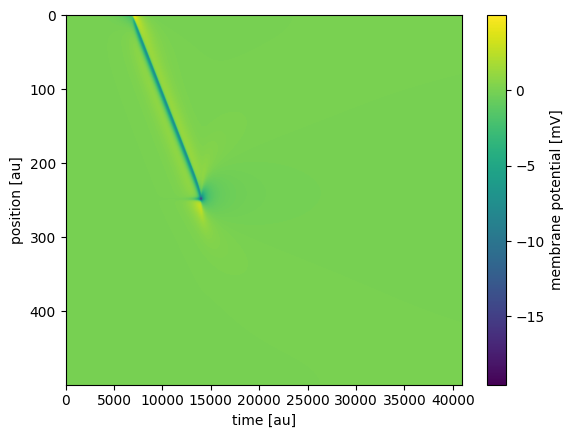

In [81]:
plt.imshow(target_simulation.v/mV, aspect='auto')
#plt.xlim(50, 250)
plt.colorbar(label='membrane potential [mV]')
plt.xlabel('time [au]')
plt.ylabel('position [au]')

Text(0, 0.5, 'membrane potential [mV]')

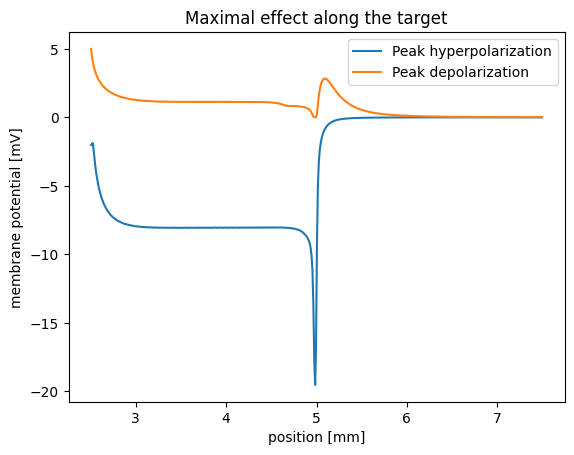

In [89]:
plt.plot(target_morpho.x/mm, np.min(target_simulation.v/mV, axis=1), label='Peak hyperpolarization')
plt.plot(target_morpho.x/mm, np.max(target_simulation.v/mV, axis=1), label='Peak depolarization')
plt.legend()
plt.title('Maximal effect along the target')
plt.xlabel("position [mm]")
plt.ylabel("membrane potential [mV]")